In [1]:
install.packages('tidyverse')
install.packages('fpp2')
install.packages('readxl')

also installing the dependencies 'broom', 'ggplot2', 'jsonlite'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
broom    0.7.6  0.7.9             FALSE
ggplot2  3.3.3  3.3.5             FALSE

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\truong le\Anaconda3\envs\rnha\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\truong le\Anaconda3\envs\rnha\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\truong le\AppData\Local\Temp\Rtmpm84Txt\downloaded_packages


installing the source packages 'broom', 'ggplot2'



package 'fpp2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\truong le\AppData\Local\Temp\Rtmpm84Txt\downloaded_packages
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\truong le\AppData\Local\Temp\Rtmpm84Txt\downloaded_packages


In [1]:
library(tidyverse)
library(fpp2)
library(readxl)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [2]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [3]:
df <- read_excel(file.choose())

In [4]:
head(df)

WEEK,9E00,02MN,03NF,07AG,09SM,0G-3,0JJV,0M61,0S1R,...,ZRLX,ZRZJ,ZS2H,ZSM8,ZT2X,ZVTJ,ZXSV,ZYLU,ZZCE,ZZU4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,58,18,4,47,0,15,5,0,...,8,0,298,19,0,32,26,44,30,11
2,11,2,24,5,16,0,272,2,0,...,14,0,265,16,12,33,196,50,5,10
3,51,0,34,37,7,0,1011,0,0,...,14,0,281,28,10,57,220,25,146,11
4,150,20,30,45,41,0,439,0,0,...,32,0,323,27,8,79,186,30,0,6
5,69,0,60,29,76,0,115,0,0,...,24,0,327,24,20,46,72,24,0,10
6,270,0,34,25,57,0,57,0,0,...,15,0,323,18,11,87,42,24,0,6


In [5]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.4 --
v ggplot2   3.3.5     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  
Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"


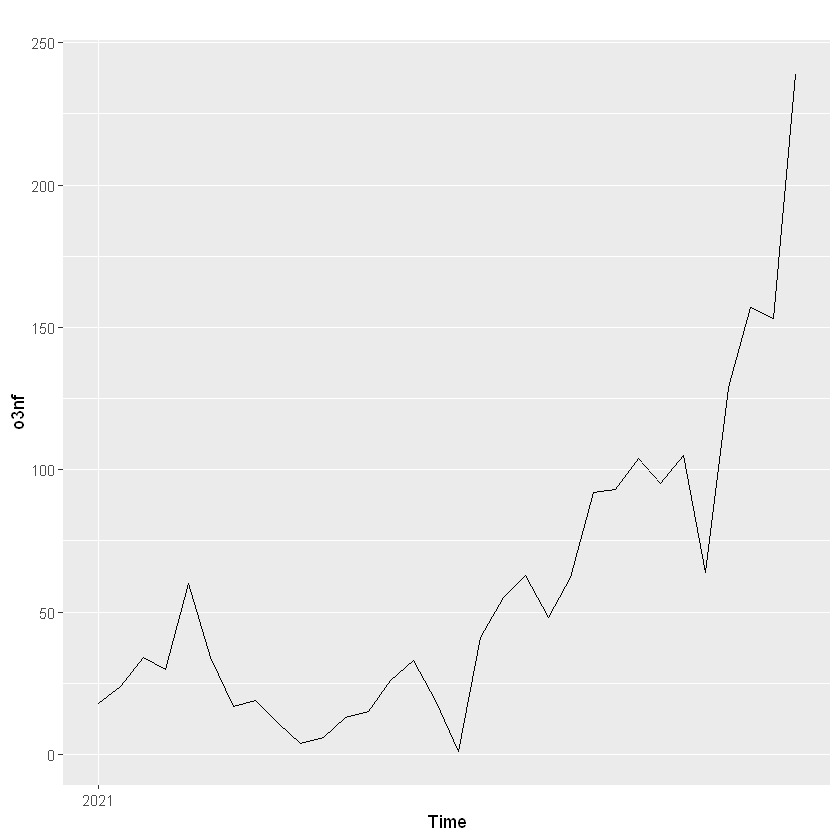

In [6]:
o3nf <- ts(df[,4],start = c(2021,1),end = c(2021,32), frequency = 52)
autoplot(o3nf)

In [7]:
train <- window(o3nf, start = c(2021,1), end = c(2021,26))
test <- window(o3nf, start = c(2021,27))

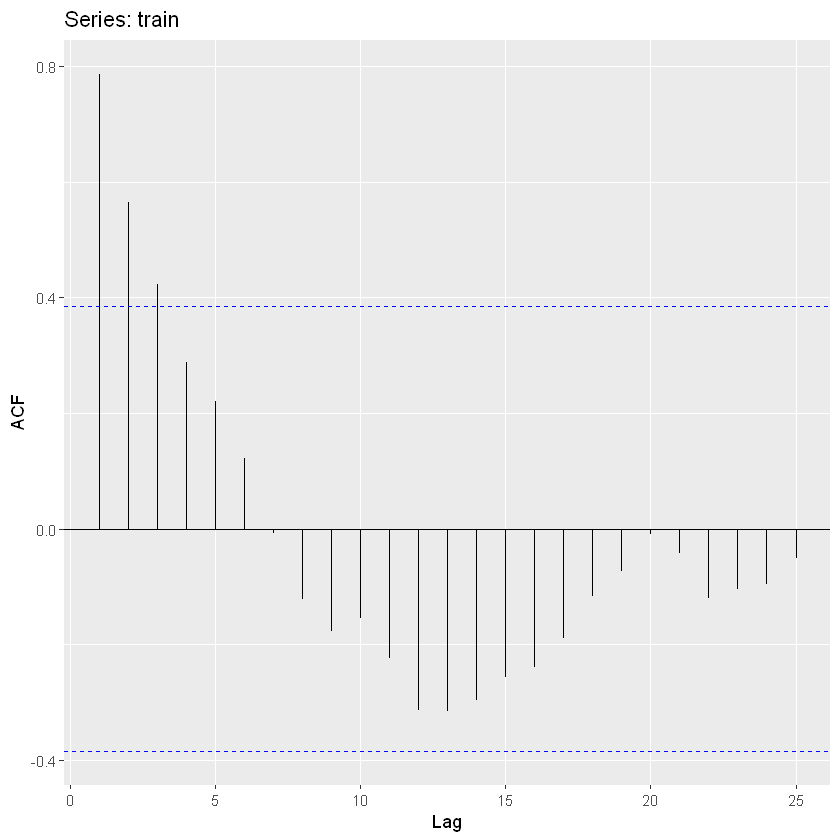

In [30]:
#acf
ggAcf(train)

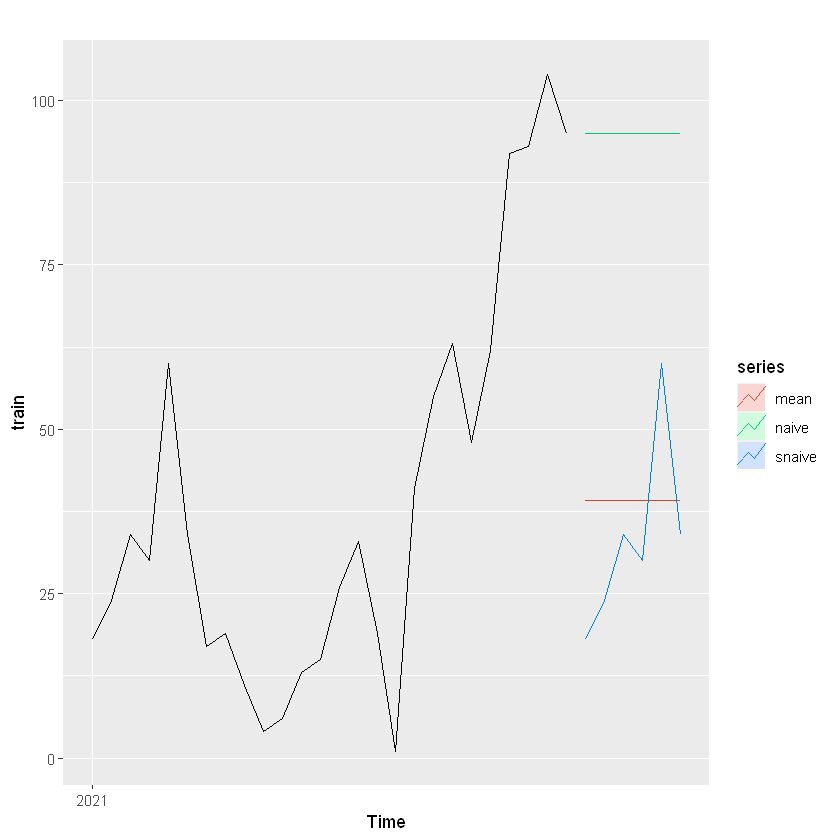

In [8]:
autoplot(train) + autolayer(meanf(train, h=6), series = "mean", PI = FALSE) + autolayer(naive(train, h=6), series = "naive",PI = FALSE) + autolayer(snaive(train, h=6), series = "snaive",PI = FALSE)


In [9]:
fit_holt <- holt(train, h=6)
print(summary(fit_holt))


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = train, h = 6) 

  Smoothing parameters:
    alpha = 0.8756 
    beta  = 1e-04 

  Initial states:
    l = 37.1397 
    b = 2.251 

  sigma:  17.1031

     AIC     AICc      BIC 
238.0086 241.0086 244.2991 

Error measures:
                     ME     RMSE      MAE       MPE     MAPE MASE       ACF1
Training set 0.02992982 15.73255 12.62752 -105.4063 132.1016  NaN 0.01864391

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500       98.51129 76.59281 120.4298 64.98986 132.0327
2021.519      100.76233 71.62830 129.8964 56.20567 145.3190
2021.538      103.01336 68.12427 137.9025 49.65510 156.3716
2021.558      105.26439 65.44240 145.0864 44.36191 166.1669
2021.577      107.51542 63.30661 151.7242 39.90388 175.1270
2021.596      109.76646 61.56758 157.9653 36.05263 183.4803
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500       98.51129 76.59281 120.4298 64.98

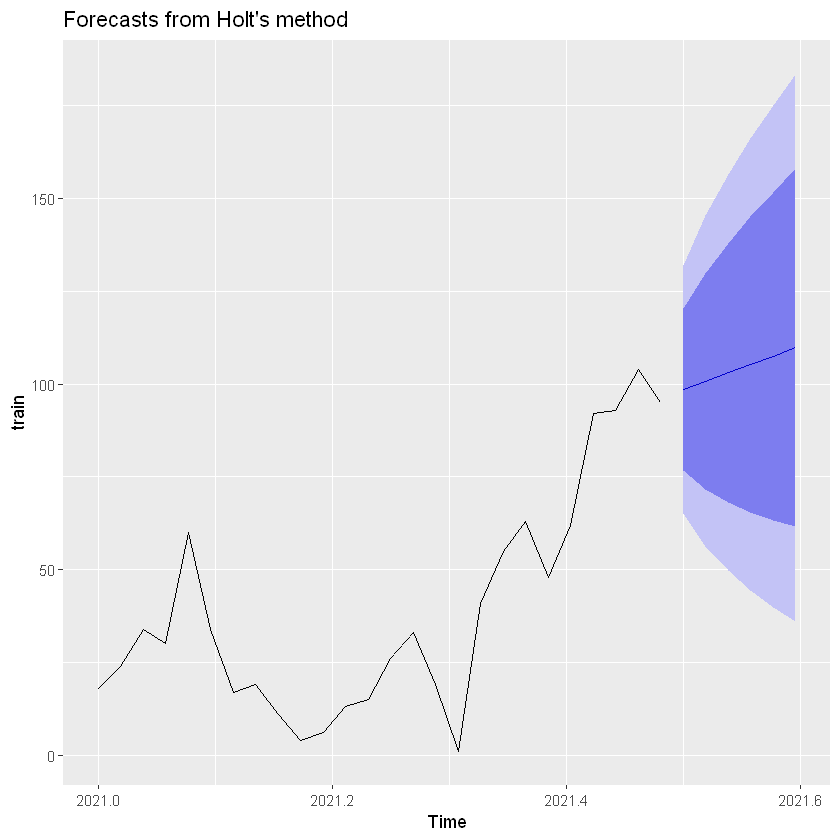

In [10]:
autoplot(fit_holt)

In [11]:
accuracy(fit_holt, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.02992982,15.73255,12.62752,-105.40635,132.10158,NaN,0.01864391,NA
Test set,37.02779148,62.60405,49.28190,14.27283,33.41987,NaN,0.24919216,0.8971477


In [12]:
fit_ses <- ses(train, h=6)
print(summary(fit_ses))


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = train, h = 6) 

  Smoothing parameters:
    alpha = 0.9556 

  Initial states:
    l = 18.2835 

  sigma:  16.1465

     AIC     AICc      BIC 
233.2779 234.3688 237.0522 

Error measures:
                  ME     RMSE      MAE       MPE     MAPE MASE        ACF1
Training set 3.10279 15.51303 12.12539 -74.62058 111.5664  NaN -0.04012801

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500       95.37739 74.68485 116.0699 63.73088 127.0239
2021.519       95.37739 66.75544 123.9993 51.60389 139.1509
2021.538       95.37739 60.58872 130.1661 42.17271 148.5821
2021.558       95.37739 55.36131 135.3935 34.17808 156.5767
2021.577       95.37739 50.74196 140.0128 27.11339 163.6414
2021.596       95.37739 46.55775 144.1970 20.71420 170.0406
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500       95.37739 74.68485 116.0699 63.73088 127.0

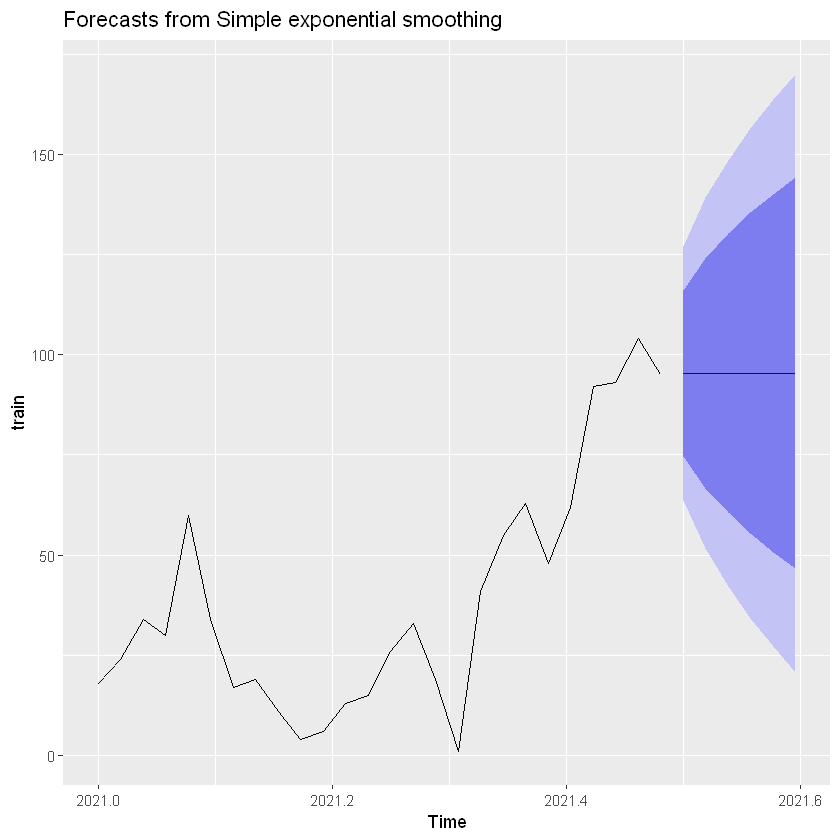

In [13]:
autoplot(fit_ses)

In [32]:
fit_holtwinter <- hw(train, h=6)
print(summary(fit_holtwinter))

ERROR: Error in hw(train, h = 6): I need at least 55 observations to estimate seasonality.


In [38]:
fit_ets <- ets(train, model = "MAZ", h=6)
print(summary(fit_ets))

ERROR: Error in ets(train, model = "MAZ", h = 6): No model able to be fitted


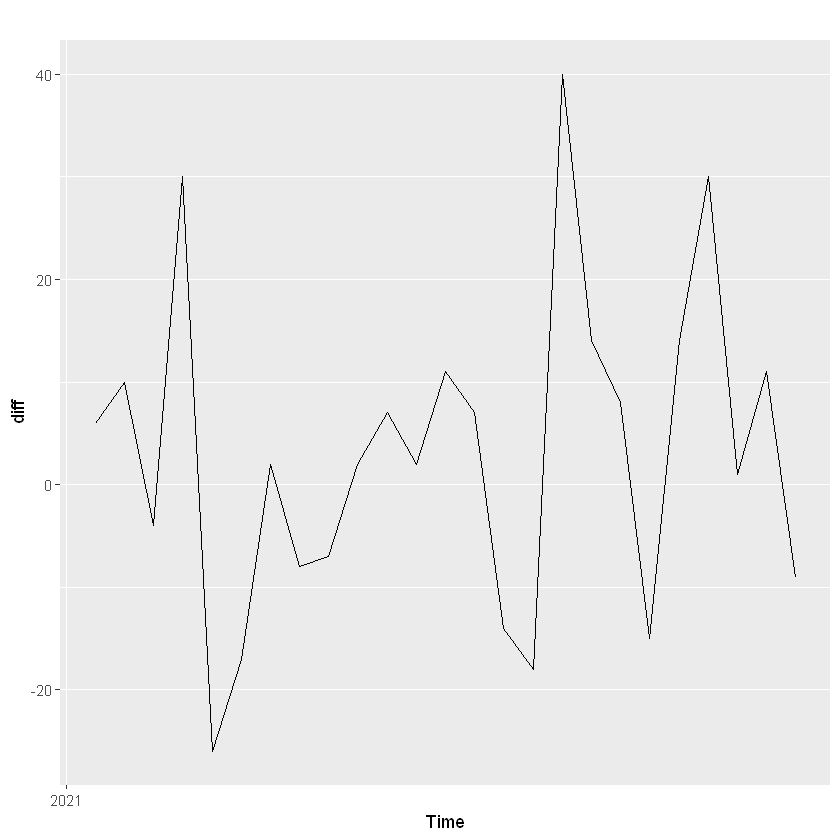

In [46]:
##### arrima
diff <- diff(train)
autoplot(diff)

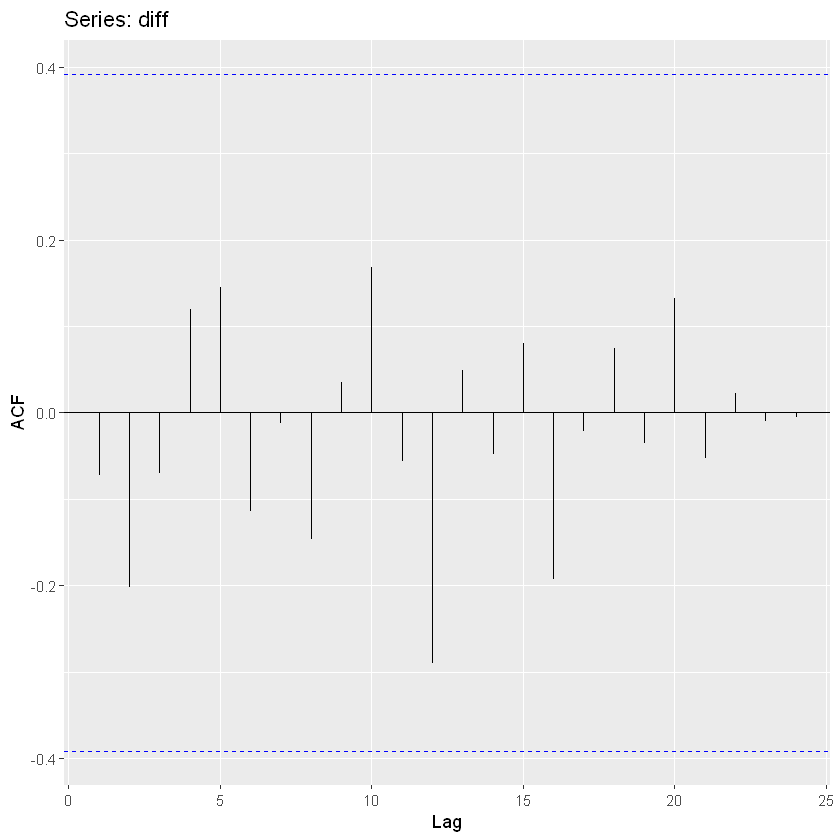

In [47]:
ggAcf(diff)

In [58]:
fit_arima <- auto.arima(train,d=1, stepwise = FALSE , approximation=FALSE)
print(summary(fit_arima))

Series: train 
ARIMA(0,1,0) 

sigma^2 estimated as 250.6:  log likelihood=-104.52
AIC=211.04   AICc=211.22   BIC=212.26

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE        ACF1
Training set 2.962231 15.52294 12.03915 -71.93511 108.9833  NaN -0.07361758
                   ME     RMSE      MAE       MPE     MAPE MASE        ACF1
Training set 2.962231 15.52294 12.03915 -71.93511 108.9833  NaN -0.07361758


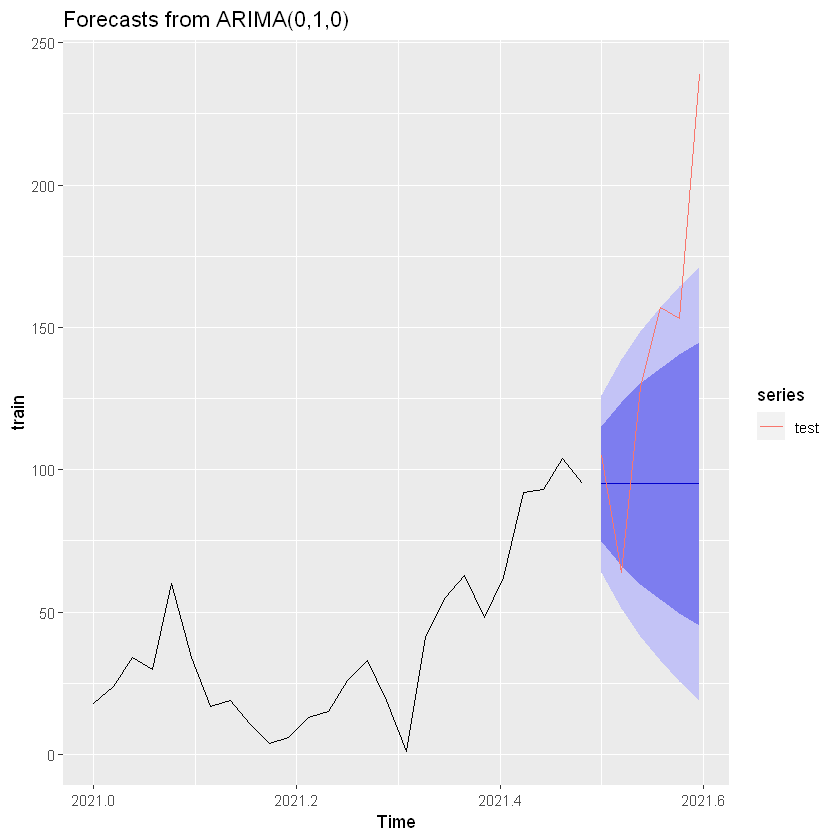

In [62]:
forc <- forecast(fit_arima, h=6)
autoplot(forc)+ autolayer(test)

In [60]:
print(summary(forc))


Forecast method: ARIMA(0,1,0)

Model Information:
Series: train 
ARIMA(0,1,0) 

sigma^2 estimated as 250.6:  log likelihood=-104.52
AIC=211.04   AICc=211.22   BIC=212.26

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE        ACF1
Training set 2.962231 15.52294 12.03915 -71.93511 108.9833  NaN -0.07361758

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500             95 74.71259 115.2874 63.97308 126.0269
2021.519             95 66.30927 123.6907 51.12131 138.8787
2021.538             95 59.86117 130.1388 41.25980 148.7402
2021.558             95 54.42518 135.5748 32.94616 157.0538
2021.577             95 49.63597 140.3640 25.62170 164.3783
2021.596             95 45.30619 144.6938 18.99988 171.0001
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021.500             95 74.71259 115.2874 63.97308 126.0269
2021.519             95 66.30927 123.6907 51.12131 138.8787
2021.538             95 59.86117 130.1388 41.259


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 2.8131, df = 5, p-value = 0.7288

Model df: 0.   Total lags used: 5



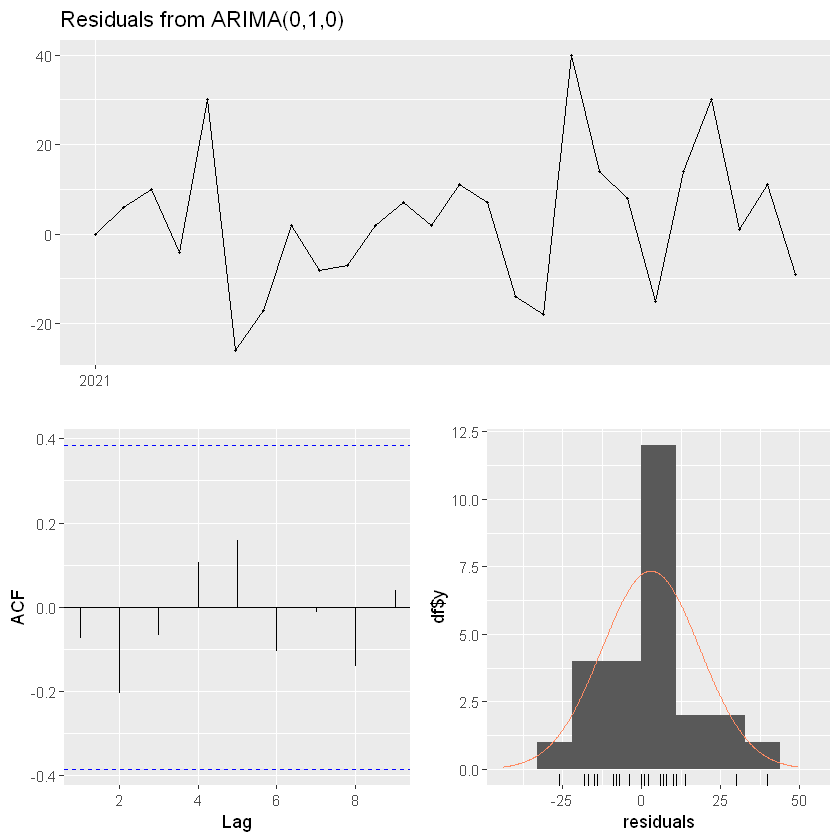

In [61]:
checkresiduals(fit_arima)

In [66]:
fit_cros <- croston(train)
print(summary(fit_cros))

ERROR: Error in croston(diff(train)): Series should not contain negative values


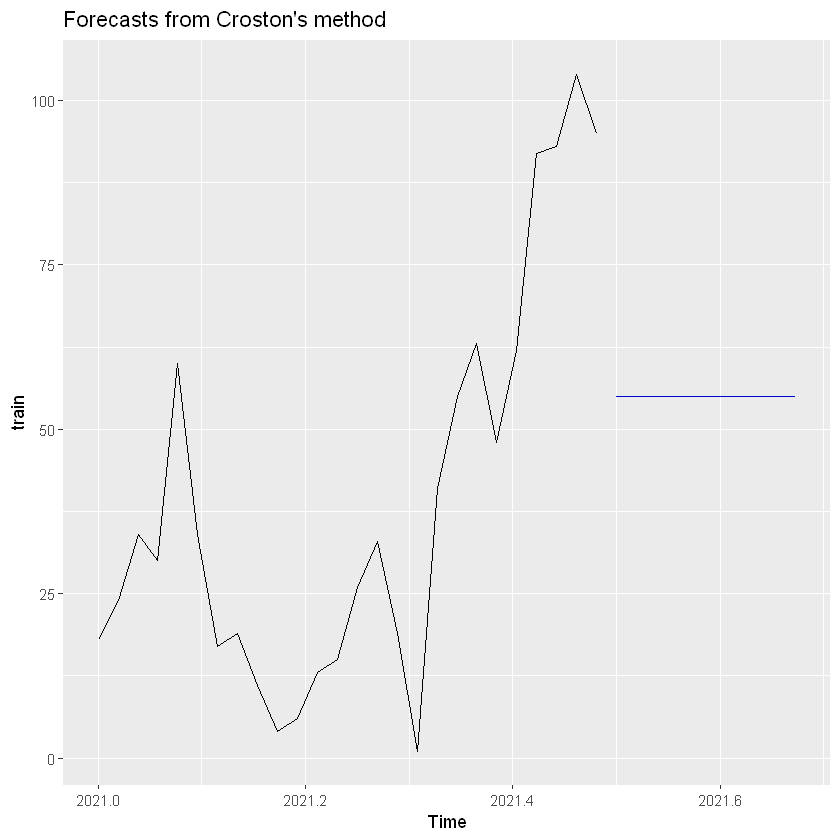

In [65]:
autoplot(fit_cros)

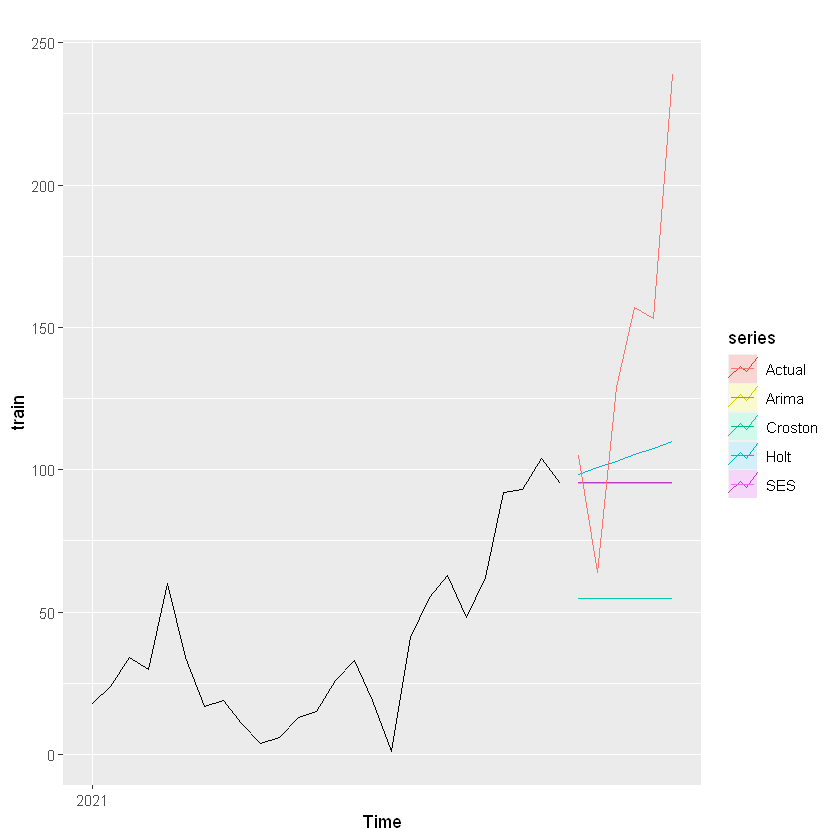

In [70]:
autoplot(train) + autolayer(forecast(fit_holt,h=6),series= "Holt", PI=FALSE)+ autolayer(forecast(fit_ses,h=6),series= "SES", PI=FALSE)+ autolayer(forecast(fit_arima,h=6),series= "Arima", PI=FALSE)+ autolayer(forecast(fit_cros,h=6),series= "Croston", PI=FALSE)+ autolayer(test,series= "Actual")

In [74]:
accuracy(fit_holt, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.02992982,15.73255,12.62752,-105.40635,132.10158,NaN,0.01864391,NA
Test set,37.02779148,62.60405,49.28190,14.27283,33.41987,NaN,0.24919216,0.8971477


In [76]:
accuracy(fit_cros, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,14.77665,28.27498,22.33350,-88.55643,149.46080,NaN,0.7430505,NA
Test set,86.22504,101.63773,86.22504,54.22426,54.22426,NaN,0.2810215,1.568933


In [77]:
accuracy(fit_ses, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,3.10279,15.51303,12.12539,-74.62058,111.56638,NaN,-0.04012801,NA
Test set,45.78927,70.65501,56.24841,20.53438,36.87677,NaN,0.28102145,1.019737


In [78]:
forc_arima <- forecast(fit_arima)


In [79]:
accuracy(forc_arima,test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.962231,15.52294,12.03915,-71.93511,108.98328,NaN,-0.07361758,NA
Test set,46.166667,70.90016,56.50000,20.84881,36.99465,NaN,0.28102145,1.023944
